In [ ]:
%matplotlib inline
import numpy as np
import tables
import matplotlib.pyplot as plt

from scipy import stats

from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry


!pwd

In [99]:
# open file and show available tables
# gamma_prod5_DL1_AL4BN15N_small.h5
# gamma_prod3_DL1_small.h5
# gamma_prod5_DL1_AL4_small.h5
f = tables.open_file('../gamma_prod5_DL1_AL4BN15N_small.h5', 'r')
print(f)

../gamma_prod5_DL1_AL4BN15N_small.h5 (File) ''
Last modif.: 'Thu Sep 17 13:40:36 2020'
Object Tree: 
/ (RootGroup) ''
/configuration (Group) ''
/dl1 (Group) ''
/simulation (Group) ''
/simulation/event (Group) ''
/simulation/event/subarray (Group) ''
/simulation/event/subarray/shower (Table(100,), fletcher32, shuffle, blosc:zstd(5)) 'Storage of EventIndexContainer,MCEventContainer'
/simulation/event/telescope (Group) ''
/simulation/event/telescope/images (Group) ''
/simulation/event/telescope/images/tel_001 (Table(37,), fletcher32, shuffle, blosc:zstd(5)) 'Storage of TelEventIndexContainer,MCDL1CameraContainer'
/simulation/event/telescope/images/tel_002 (Table(44,), fletcher32, shuffle, blosc:zstd(5)) 'Storage of TelEventIndexContainer,MCDL1CameraContainer'
/simulation/event/telescope/images/tel_003 (Table(47,), fletcher32, shuffle, blosc:zstd(5)) 'Storage of TelEventIndexContainer,MCDL1CameraContainer'
/simulation/event/telescope/images/tel_004 (Table(49,), fletcher32, shuffle, blosc:z

In [100]:
# trigger information
trigger = f.root.dl1.event.subarray.trigger
print(trigger[0])
print()
for i in range(10):
    if sum(trigger[i][3][:4])==4:
        print(i, trigger[i][3][:4])


(100, 1200, 59039.71231491, [False, False, False, False,  True, False, False, False, False,  True,  True, False, False, False,  True, False,  True,  True, False,  True, False, False, False, False,  True,  True, False, False, False,  True,  True,  True,  True, False, False,  True, False,  True,  True,  True,  True,  True, False, False, False, False, False, False,  True, False,  True,  True,  True,  True,  True, False,  True, False, False, False], 32)

2 [ True  True  True  True]
3 [ True  True  True  True]
7 [ True  True  True  True]
8 [ True  True  True  True]
9 [ True  True  True  True]


In [101]:
# all camera parameters information available
f.root.dl1.event.telescope.parameters.tel_001


/dl1/event/telescope/parameters/tel_001 (Table(37,), fletcher32, shuffle, blosc:zstd(5)) 'Storage of TelEventIndexContainer,HillasParametersContainer,TimingParametersContainer,LeakageContainer,ConcentrationContainer,MorphologyContainer,IntensityStatisticsContainer,PeakTimeStatisticsContainer'
  description := {
  "obs_id": Int32Col(shape=(), dflt=0, pos=0),
  "event_id": Int64Col(shape=(), dflt=0, pos=1),
  "tel_id": Int16Col(shape=(), dflt=0, pos=2),
  "hillas_intensity": Float64Col(shape=(), dflt=0.0, pos=3),
  "hillas_x": Float64Col(shape=(), dflt=0.0, pos=4),
  "hillas_y": Float64Col(shape=(), dflt=0.0, pos=5),
  "hillas_r": Float64Col(shape=(), dflt=0.0, pos=6),
  "hillas_phi": Float64Col(shape=(), dflt=0.0, pos=7),
  "hillas_length": Float64Col(shape=(), dflt=0.0, pos=8),
  "hillas_width": Float64Col(shape=(), dflt=0.0, pos=9),
  "hillas_psi": Float64Col(shape=(), dflt=0.0, pos=10),
  "hillas_skewness": Float64Col(shape=(), dflt=0.0, pos=11),
  "hillas_kurtosis": Float64Col(shape

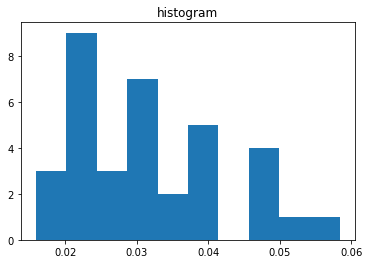

In [102]:
# plot Hillas width for LST1
hillas_width_LST1 = f.root.dl1.event.telescope.parameters.tel_001.col('hillas_width')
plt.hist(hillas_width_LST1) 
plt.title("histogram") 
plt.show()

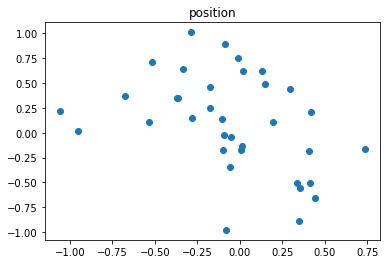

In [103]:
# plot Hillas x vs y for LST1
hillas_x_LST1 = f.root.dl1.event.telescope.parameters.tel_001.col('hillas_x')
hillas_y_LST1 = f.root.dl1.event.telescope.parameters.tel_001.col('hillas_y')
plt.scatter(hillas_x_LST1, hillas_y_LST1) 
plt.title("position") 
plt.show()

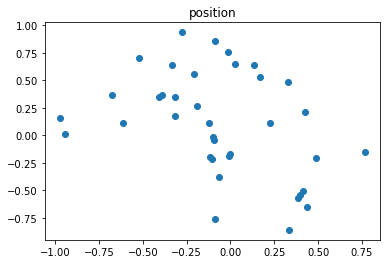

In [104]:
# plot difference between real data and simulation for Hillas x and y for LST1
hillas_x_LST1_sim = f.root.simulation.event.telescope.parameters.tel_001.col('hillas_x')
hillas_y_LST1_sim = f.root.simulation.event.telescope.parameters.tel_001.col('hillas_y')
plt.scatter(hillas_x_LST1_sim, hillas_y_LST1_sim) 
plt.title("position") 
plt.show()

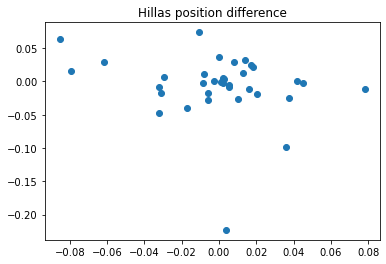

In [105]:
plt.scatter(hillas_x_LST1-hillas_x_LST1_sim, hillas_y_LST1-hillas_y_LST1_sim) 
plt.title('Hillas position difference')
plt.show()

In [106]:
# looking the image information
f.root.dl1.event.telescope.images.tel_001

/dl1/event/telescope/images/tel_001 (Table(37,), fletcher32, shuffle, blosc:zstd(5)) 'Storage of TelEventIndexContainer,DL1CameraContainer'
  description := {
  "obs_id": Int32Col(shape=(), dflt=0, pos=0),
  "event_id": Int64Col(shape=(), dflt=0, pos=1),
  "tel_id": Int16Col(shape=(), dflt=0, pos=2),
  "image": Float32Col(shape=(1855,), dflt=0.0, pos=3),
  "peak_time": Float32Col(shape=(1855,), dflt=0.0, pos=4),
  "image_mask": BoolCol(shape=(1855,), dflt=False, pos=5)}
  byteorder := 'little'
  chunkshape := (15,)

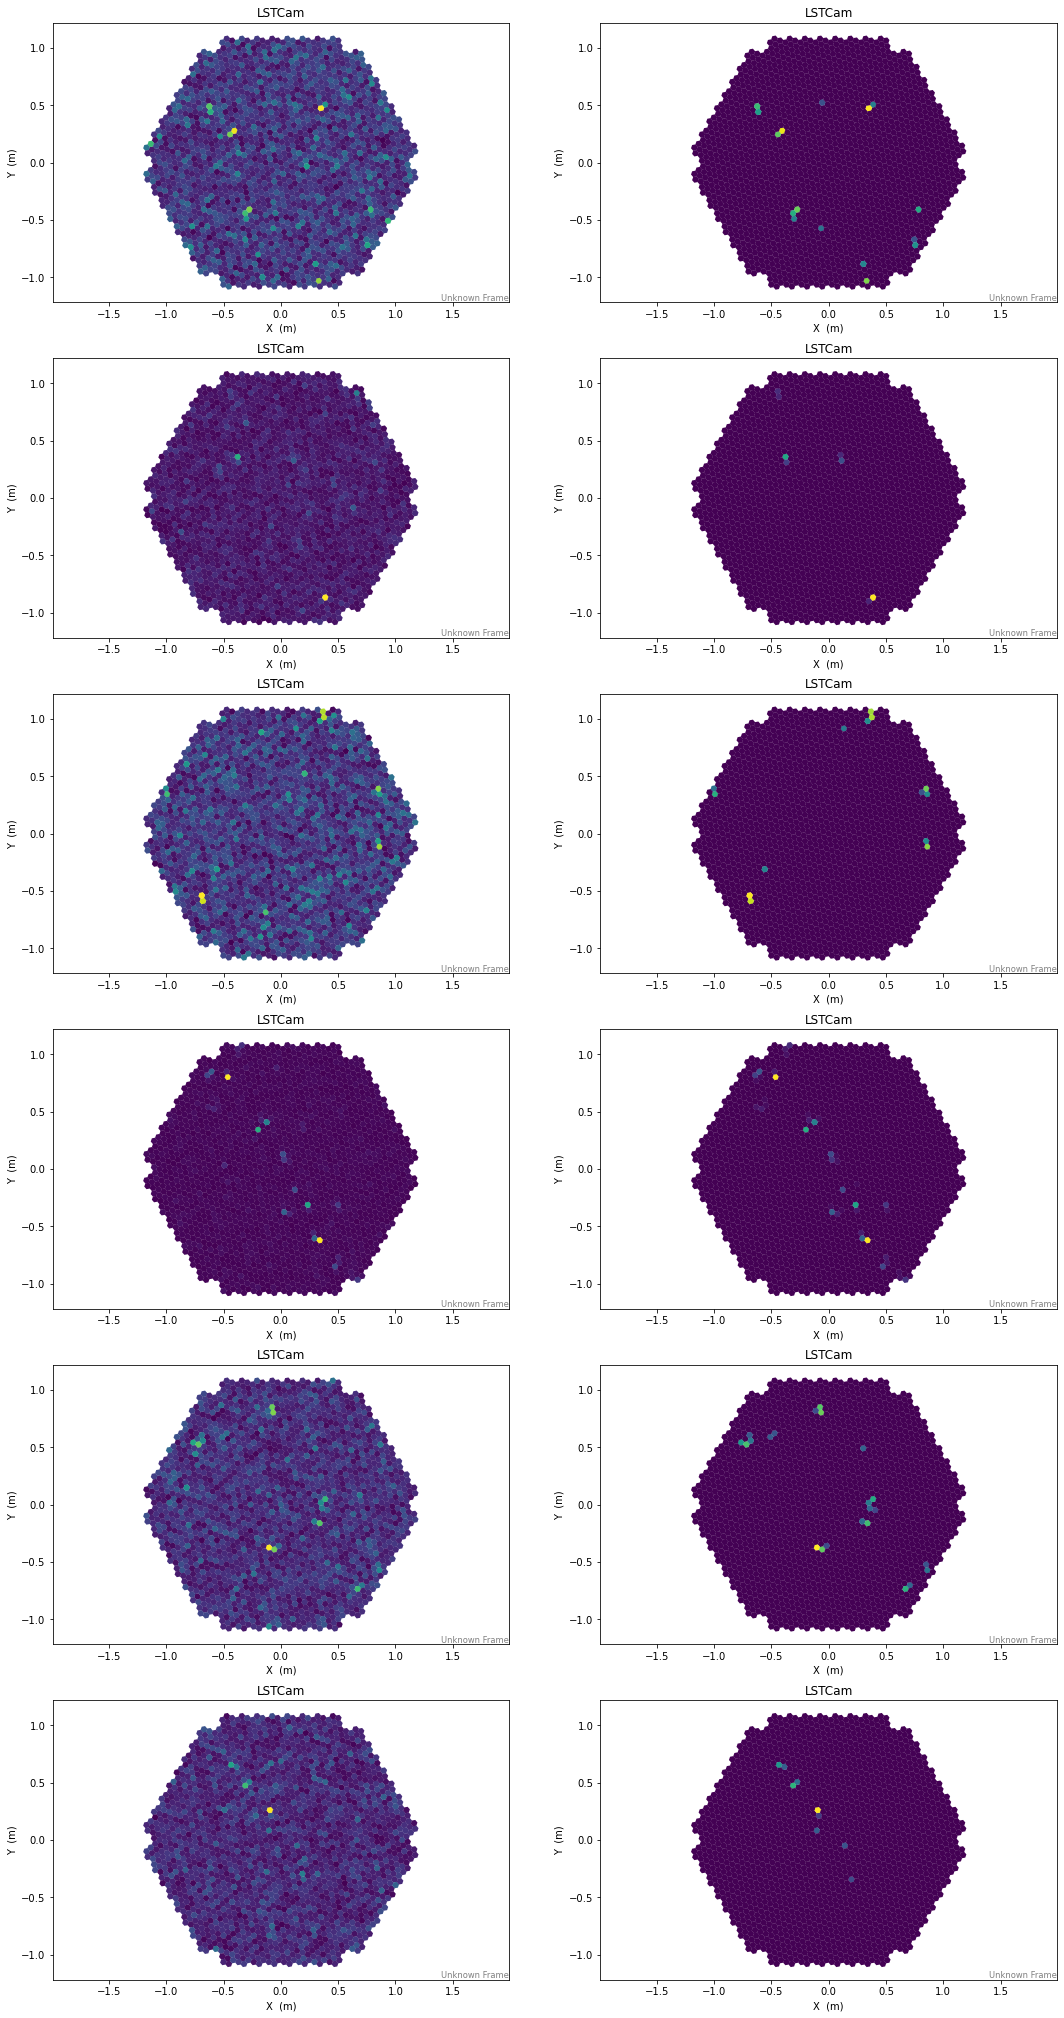

In [107]:
# plot a few cleaned images from LST1
img_LST1 = f.root.dl1.event.telescope.images.tel_001.col('image')
mask_LST1 = f.root.dl1.event.telescope.images.tel_001.col('image_mask')
geom = CameraGeometry.from_name("LSTCam")

n = 20
disp = list()
plt.figure(figsize=(18,36))
for i in range(0, 12, 2):
    plt.subplot(6, 2, i+1)
    disp.append(CameraDisplay(geom))
    disp[-1].image = img_LST1[i+n]
    plt.subplot(6, 2, i+2)
    disp.append(CameraDisplay(geom))
    disp[-1].image = img_LST1[i+n]*mask_LST1[i+n]


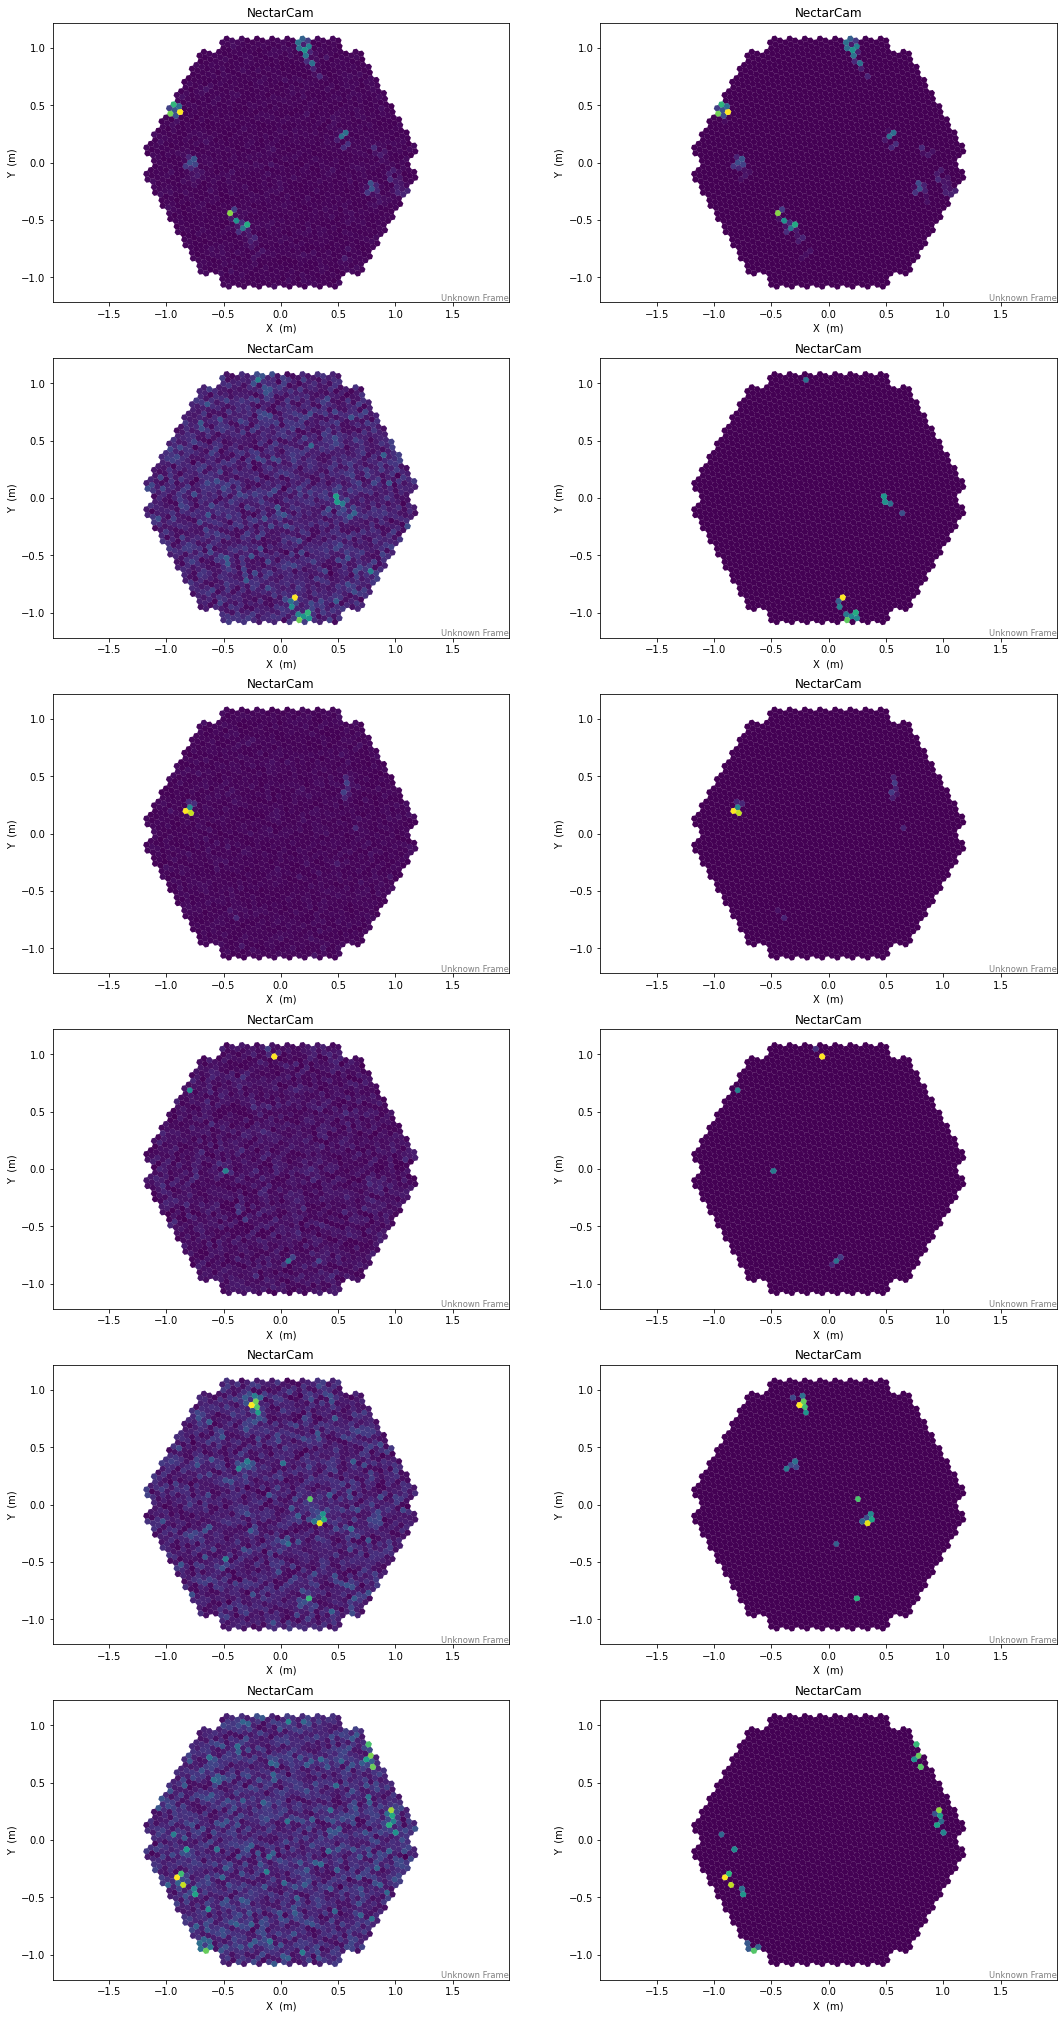

In [109]:
# plot a few cleaned images from LST1
img_MST3 = f.root.dl1.event.telescope.images.tel_007.col('image')
mask_MST3 = f.root.dl1.event.telescope.images.tel_007.col('image_mask')
geom = CameraGeometry.from_name("NectarCam")

n = 0
disp = list()
plt.figure(figsize=(18,36))
for i in range(0, 12, 2):
    plt.subplot(6, 2, i+1)
    disp.append(CameraDisplay(geom))
    disp[-1].image = img_MST3[i+n]
    plt.subplot(6, 2, i+2)
    disp.append(CameraDisplay(geom))
    disp[-1].image = img_MST3[i+n]*mask_MST3[i+n]
